<a href="https://colab.research.google.com/github/YADHUSUDHAN/AIL411-DEEP-LEARNING-LAB-KTU/blob/main/weight_initialization_and_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and Load Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import glorot_normal, he_normal
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


**Load and Preprocess Data**

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)


**Define and Train Baseline Model**

In [ ]:
# Train baseline model
model_baseline = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_baseline.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_baseline = model_baseline.fit(X_train.reshape(-1, 32*32*3), y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)


**Define and Train Models with Different Initialization and Regularization**

In [ ]:
# Train Xavier initialization model
model_xavier = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,), kernel_initializer=glorot_normal()),
    Dense(128, activation='relu', kernel_initializer=glorot_normal()),
    Dense(64, activation='relu', kernel_initializer=glorot_normal()),
    Dense(10, activation='softmax', kernel_initializer=glorot_normal())
])

model_xavier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_xavier = model_xavier.fit(X_train.reshape(-1, 32*32*3), y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)



In [ ]:
# Train Kaiming initialization model
model_kaiming = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,), kernel_initializer=he_normal()),
    Dense(128, activation='relu', kernel_initializer=he_normal()),
    Dense(64, activation='relu', kernel_initializer=he_normal()),
    Dense(10, activation='softmax', kernel_initializer=he_normal())
])

model_kaiming.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_kaiming = model_kaiming.fit(X_train.reshape(-1, 32*32*3), y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)



In [ ]:
# Train dropout model
model_dropout = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train.reshape(-1, 32*32*3), y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)



In [ ]:
# Train L2 regularization model
model_l2 = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,), kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model_l2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(X_train.reshape(-1, 32*32*3), y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)

**Plot Learning Curves**

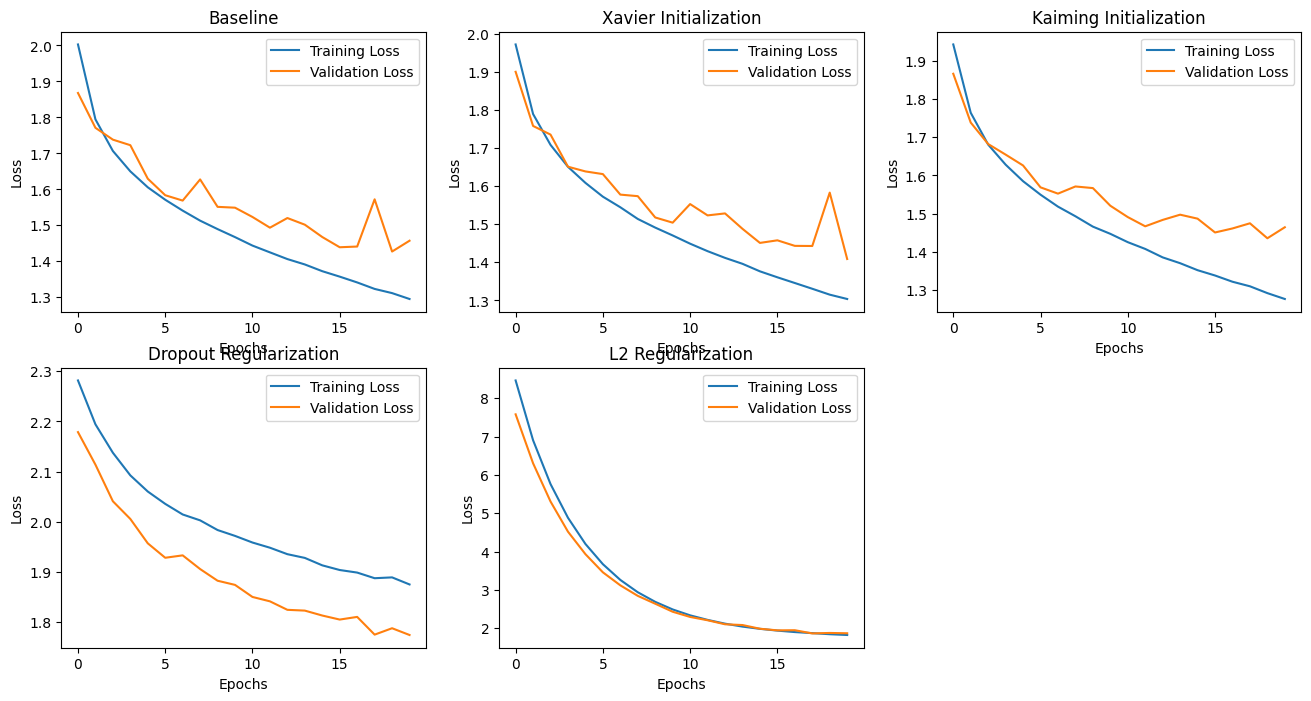

In [ ]:
# Plot learning curves
plt.figure(figsize=(16, 8))
for i, (history, model_name) in enumerate([(history_baseline, 'Baseline'), (history_xavier, 'Xavier Initialization'),
                                           (history_kaiming, 'Kaiming Initialization'), (history_dropout, 'Dropout Regularization'),
                                           (history_l2, 'L2 Regularization')], 1):
    plt.subplot(2, 3, i)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(model_name)

plt.show()


**Evaluate Models on the Test Set**

In [ ]:
# Evaluate models on the test set
models = [model_baseline, model_xavier, model_kaiming, model_dropout, model_l2]
model_names = ['Baseline', 'Xavier Initialization', 'Kaiming Initialization', 'Dropout Regularization', 'L2 Regularization']

for model, name in zip(models, model_names):
    test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 32*32*3), y_test, verbose=0)
    print(f"Test accuracy ({name}): {test_accuracy}")


Test accuracy (Baseline): 0.4959999918937683
Test accuracy (Xavier Initialization): 0.5080000162124634
Test accuracy (Kaiming Initialization): 0.4821000099182129
Test accuracy (Dropout Regularization): 0.36739999055862427
Test accuracy (L2 Regularization): 0.42649999260902405
